<a href="https://colab.research.google.com/github/MailenGonzalez/Aprendizaje-de-maquina_UNS/blob/main/TP3_problemaRGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Nro 3
## Procesamiento de Imágenes
*Realizado por Mailen Gonzalez*

Implementar:


*   En Espacio RGB:
1.   Suma y resta clampeada
2.   Suma y resta promediada
*   En espacio YIQ:
1.   suma y resta clampeada
2.   suma y resta promediada
3.   suma y resta if-lighter
4.   suma y resta if-darker


*Importamos bibliotecas necesarias:*

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread



*Definimos funciones generales a utilizar:*

In [19]:
#Levanta una imagen dada  
def getImage(path):
  image = imread(path)
  return image

#Retorna los canales r g y b de una imagen  
def getRGB(img):
  r = img[:,:,0]
  g = img[:,:,1]
  b = img[:,:,2]
  return r,g,b

#Construir Imagen a partir de sus componentes RGB
def to_image(r,g,b):
  shape = r.shape
  img = np.zeros((shape[0], shape[1], 3))
  img[:,:,0] = r
  img[:,:,1] = g
  img[:,:,2] = b
  return img.astype(np.uint8)

#Normaliza imagenes entre 0 y 1
def normalize(img):
  return img/255.0

def denormalize(img):
  denorm = np.uint8(img*255)
  return np.clip(denorm,0,255)

#convierte la imagen a una matriz numpy
def imageToArray(img):
  return np.array(img)

#Transforma de RGB a YIQ
def toYIQ(img):
  yiq_matrix = np.array([[0.299, 0.587, 0.114],[ 0.595716, -0.274453, -0.321263],[0.211456, -0.522591, 0.311135]])
  yiq_matrix = np.dot(img, yiq_matrix.T)
  return np.clip(yiq_matrix, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))

#convierte una imagen de YIQ a RGB
def toRGB(img):
  rgb_matrix = np.array([[1, 0.9663, 0.6210],[ 1, -0.2721, -0.6474],[1, -1.1070, 1.7046]])
  rgb_matrix = np.dot(img, rgb_matrix.T)    
  return np.clip(rgb_matrix,0,1)

#grafica una imagen
def plotImage(img):
  plt.imshow(img);

#graficamoslas imagenes
def plotImages(img1, img2, resultImg):
  fig, axes = plt.subplots(1, 3, figsize=(20, 20))
  ax = axes.ravel()
  ax[0].imshow(img1)
  ax[0].set_title("Image 1")
  ax[1].imshow(img2)
  ax[1].set_title("Image 2")
  ax[2].imshow(resultImg)
  ax[2].set_title("Result Image")
  fig.tight_layout()
  plt.show()

*Definimos operaciones en RGB*

In [25]:
#suma clampeada en RGB
def clamp_sum_RGB(img1, img2):
  img_sum = np.copy(img1)
  r1, g1, b1 = getRGB(img1)
  r2, g2, b2 = getRGB(img2)
  r_sum = r1 + r2
  g_sum = g1 + g2
  b_sum = b1 + b2
  r_sum = np.clip(r_sum, 0, 255)
  g_sum = np.clip(g_sum, 0, 255)
  b_sum = np.clip(b_sum, 0, 255)
  img_sum = to_image(r_sum,g_sum,b_sum)
  return img_sum

#Resta clampeada RGB
def clamp_sub_RGB(img1, img2):
  img_sub = np.copy(img1)
  img_sub = np.clip(img1 - img2,0, 255)
  return img_sub

#suma promediada RGB
def avg_sum_RGB(img1, img2):
  img_sum = np.copy(img1)
  img_sum = np.uint8((img1 + img2) / 2)
  img_sum = np.clip(img_sum, 0, 255)
  return img_sum  

#resta promediada RGB
def avg_sub_RGB(img1, img2):
  img_sub= np.copy(img1)
  img_sub = np.uint8((img1 - img2)/2)
  img_sub = np.clip(img_sub, 0, 255)
  return img_sub

*Definimos operaciones en YIQ:*

In [21]:
#suma clampeada en YIQ
def clamp_sum_YIQ(img1, img2):
  img1_YIQ = toYIQ(normalize(img1))
  img2_YIQ = toYIQ(normalize(img2))
  img_sum = np.copy(img1_YIQ)
  img_sum[:,:,0] = np.clip(img1_YIQ[:,:,0]+ img2_YIQ[:,:,0], None, 1)
  img_sum[:,:,1] = np.clip((img1_YIQ[:,:,0] * img1_YIQ[:,:,1] + img2_YIQ[:,:,0] * img2_YIQ[:,:,1])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]), -0.5956, 0.5956)
  img_sum[:,:,2] = np.clip((img1_YIQ[:,:,0] * img1_YIQ[:,:,2] + img2_YIQ[:,:,0] * img2_YIQ[:,:,2])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]), -0.5225, 0.5225)
  img_sum = denormalize(toRGB(img_sum))
  return img_sum

#resta clampeada en YIQ
def clamp_sub_YIQ(img1, img2):
  img1_YIQ = toYIQ(normalize(img1))
  img2_YIQ = toYIQ(normalize(img2))
  img_sum = np.copy(img1_YIQ)
  img_sum[:,:,0] = np.clip(img1_YIQ[:,:,0] - img2_YIQ[:,:,0], None, 1)
  img_sum[:,:,1] = np.clip((img1_YIQ[:,:,0] * img1_YIQ[:,:,1] - img2_YIQ[:,:,0] * img2_YIQ[:,:,1])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]), -0.5956, 0.5956)
  img_sum[:,:,2] = np.clip((img1_YIQ[:,:,0] * img1_YIQ[:,:,2] - img2_YIQ[:,:,0] * img2_YIQ[:,:,2])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]), -0.5225, 0.5225)
  img_sum = denormalize(toRGB(img_sum))
  return img_sum

#suma promediada en YIQ
def avg_sum_YIQ(img1, img2):
  img1_YIQ = toYIQ(normalize(img1))
  img2_YIQ = toYIQ(normalize(img2))
  img_sum = np.copy(img1_YIQ)
  img_sum[:,:,0] = np.clip((img1_YIQ[:,:,0]+ img2_YIQ[:,:,0])/2, None, 1)
  img_sum[:,:,1] = np.clip((img1_YIQ[:,:,0] * img1_YIQ[:,:,1] + img2_YIQ[:,:,0] * img2_YIQ[:,:,1])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]), -0.5956, 0.5956)
  img_sum[:,:,2] = np.clip((img1_YIQ[:,:,0] * img1_YIQ[:,:,2] + img2_YIQ[:,:,0] * img2_YIQ[:,:,2])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]), -0.5225, 0.5225)
  img_sum = denormalize(toRGB(img_sum))
  return img_sum

#resta promediada en YIQ
def avg_sub_YIQ(img1, img2):
  img1_YIQ = toYIQ(normalize(img1))
  img2_YIQ = toYIQ(normalize(img2))
  img_sum = np.copy(img1_YIQ)
  img_sum[:,:,0] = np.clip((img1_YIQ[:,:,0] - img2_YIQ[:,:,0])/2, None, 1)
  img_sum[:,:,1] = np.clip((img1_YIQ[:,:,0] * img1_YIQ[:,:,1] - img2_YIQ[:,:,0] * img2_YIQ[:,:,1])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]), -0.5956, 0.5956)
  img_sum[:,:,2] = np.clip((img1_YIQ[:,:,0] * img1_YIQ[:,:,2] - img2_YIQ[:,:,0] * img2_YIQ[:,:,2])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]), -0.5225, 0.5225)
  img_sum = denormalize(toRGB(img_sum))
  return img_sum  

def if_lighter(img1, img2):
  img1_YIQ = toYIQ(normalize(img1))
  img2_YIQ = toYIQ(normalize(img2))
  img_lighter = np.copy(img1_YIQ)
  high, width, channels = img1_YIQ.shape
  for row in range(high):
    for col in range(width):
      Y1= img1_YIQ[row, col, 0]
      Y2= img2_YIQ[row, col, 0]
      if Y1>Y2:
        img_lighter[row,col,0] = Y1
        img_lighter[row,col,1] = img1_YIQ[row, col, 1]
        img_lighter[row,col,2] = img1_YIQ[row, col, 2]
      else:
        img_lighter[row,col,0] = Y2
        img_lighter[row,col,1] = img2_YIQ[row, col, 1]
        img_lighter[row,col,2] = img2_YIQ[row, col, 2]


  return img_lighter

def if_darker(img1, img2):
  img1_YIQ = toYIQ(normalize(img1))
  img2_YIQ = toYIQ(normalize(img2))
  img_darker = np.copy(img1_YIQ)
  high, width, channels = img1_YIQ.shape
  for row in range(high):
    for col in range(width):
      Y1= img1_YIQ[row, col, 0]
      Y2= img2_YIQ[row, col, 0]
      if Y1<Y2:
        img_darker[row,col,0] = Y1
        img_darker[row,col,1] = img1_YIQ[row, col, 1]
        img_darker[row,col,2] = img1_YIQ[row, col, 2]
      else:
        img_darker[row,col,0] = Y2
        img_darker[row,col,1] = img2_YIQ[row, col, 1]
        img_darker[row,col,2] = img2_YIQ[row, col, 2]
  img_darker = denormalize(toRGB(img_darker))      
  return img_darker        

*Elegimos las imagenes a utilizar:*

**ACLARACION: OPERAR UTILIZANDO LAS COMBINACIONES:  NATURE Y DOG, CHESHIRE Y DOLPHINS**

Array([[[  8.,  91.,  23.],
        [  0.,  75.,  13.],
        [  1.,  85.,  35.],
        ...,
        [  1., 111., 186.],
        [  1., 111., 186.],
        [  1., 111., 186.]],

       [[ 44., 119.,  60.],
        [ 25., 104.,  47.],
        [ 30., 109.,  61.],
        ...,
        [  2., 112., 187.],
        [  2., 112., 187.],
        [  2., 112., 187.]],

       [[  0.,  66.,  13.],
        [  0.,  62.,  11.],
        [  6.,  78.,  30.],
        ...,
        [  2., 112., 187.],
        [  2., 112., 187.],
        [  2., 112., 187.]],

       ...,

       [[188., 192., 177.],
        [189., 193., 178.],
        [189., 193., 178.],
        ...,
        [ 26., 162., 160.],
        [ 25., 161., 159.],
        [ 23., 159., 157.]],

       [[188., 192., 177.],
        [188., 192., 177.],
        [189., 193., 178.],
        ...,
        [ 21., 158., 177.],
        [ 21., 158., 177.],
        [ 21., 158., 177.]],

       [[188., 192., 177.],
        [188., 192., 177.],
        [189., 1

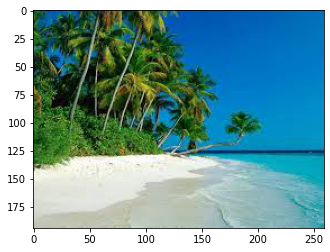

In [26]:
#@title Selecccione una Imagen. { run: "auto" }

Nature = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHJbh63G7GRoh7rTSo9vi5YaDOtdrhHwhIYg&usqp=CAU'
Dog = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT857d49fR07wrKEwUriV-pXeG0h36w8x8ylQ&usqp=CAU'
Cheshire = 'http://www.fonditos3d.com/800x600/gato-cheshire-3d.jpg'
Dolphins = 'http://www.fondosanimales.com/800x600/delfines-nadando-en-el-oceano.jpg'

image1 = 'Nature' #@param ["Dog", "Nature", "Cheshire", "Dolphins"]

if image1 == 'Nature':
  img1 = getImage(Nature)
  plotImage(img1)
elif image1 == 'Dog':
  img1= getImage(Dog)
  plotImage(img1)
elif image1 == 'Cheshire':
  img1= getImage(Cheshire)
  plotImage(img1)
elif image1 == 'Dolphins':
  img1= getImage(Dolphins)
  plotImage(img1)

img1.astype('float')

Array([[[104., 106., 103.],
        [104., 106., 103.],
        [103., 105., 102.],
        ...,
        [ 95., 104.,  87.],
        [ 90.,  99.,  82.],
        [ 82.,  91.,  74.]],

       [[104., 106., 103.],
        [104., 106., 103.],
        [103., 105., 102.],
        ...,
        [ 96., 107.,  90.],
        [ 91., 102.,  85.],
        [ 84.,  95.,  78.]],

       [[105., 107., 104.],
        [105., 107., 104.],
        [104., 106., 103.],
        ...,
        [ 99., 112.,  94.],
        [ 95., 108.,  90.],
        [ 89., 102.,  84.]],

       ...,

       [[187., 172., 169.],
        [190., 175., 172.],
        [193., 178., 175.],
        ...,
        [130., 125., 121.],
        [130., 125., 121.],
        [130., 125., 121.]],

       [[184., 167., 160.],
        [185., 167., 163.],
        [186., 168., 164.],
        ...,
        [133., 131., 134.],
        [133., 131., 134.],
        [133., 131., 134.]],

       [[184., 167., 160.],
        [185., 167., 163.],
        [186., 1

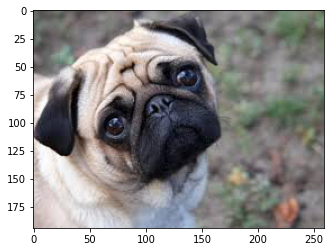

In [27]:
#@title Selecccione otra imagen. { run: "auto" }
image2 = 'Dog' #@param ["Dog", "Nature", "Cheshire", "Dolphins"]

if image2 == 'Nature':
  img2 = getImage(Nature)
  plotImage(img2)
elif image2 == 'Dog':
  img2= getImage(Dog)
  plotImage(img2)  
elif image2 == 'Cheshire':
  img2= getImage(Cheshire)
  plotImage(img2)
elif image2 == 'Dolphins':
  img2= getImage(Dolphins)
  plotImage(img2)

img2.astype('float')

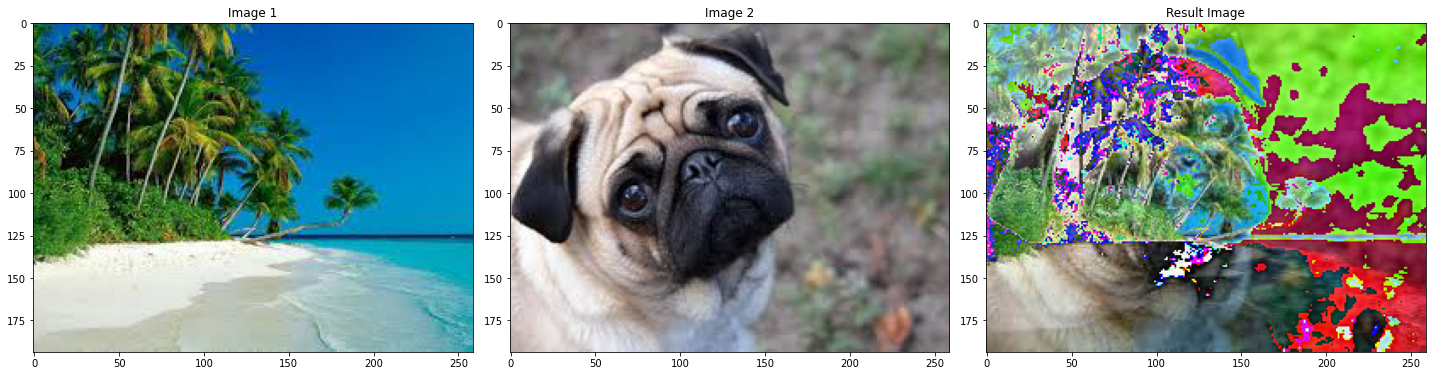

In [28]:
#@title Selecccione otra imagen. { run: "auto" }

#@title Selecccione una Imagen. { run: "auto" }
operacion = 'clamp_sum_RGB' #@param ["clamp_sum_RGB", "clamp_sub_RGB", "avg_sum_RGB", "avg_sub_RGB","clamp_sum_YIQ", 'clamp_sub_YIQ', "avg_sum_YIQ", "avg_sub_YIQ", "if_darker_YIQ", "if_lighter_YIQ"]

if operacion == 'clamp_sum_RGB':
  result_img = clamp_sum_RGB(img1, img2)
elif operacion == 'clamp_sub_RGB':
  result_img = clamp_sub_RGB(img1, img2)
elif operacion == 'avg_sum_RGB':
  result_img = avg_sum_RGB(img1, img2)
elif operacion == 'avg_sub_RGB':
  result_img = avg_sub_RGB(img1, img2)
elif operacion == 'clamp_sum_YIQ':
  result_img = clamp_sum_YIQ(img1, img2)
elif operacion == 'clamp_sub_YIQ':
  result_img = clamp_sub_YIQ(img1, img2)
elif operacion == 'avg_sum_YIQ':
  result_img = avg_sum_YIQ(img1, img2)
elif operacion == 'avg_sub_YIQ':
  result_img = avg_sub_YIQ(img1, img2) 
elif operacion == 'if_darker_YIQ':
  result_img = if_darker(img1, img2) 
elif operacion == 'if_lighter_YIQ':
  result_img = if_lighter(img1, img2)  
   
plotImages(img1, img2, result_img)

